<a href="https://colab.research.google.com/github/AleemRahil/AI-DS/blob/main/UBER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**UBER Data Analysis**#

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar


In [7]:
data=pd.read_csv('Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
data.isna()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [9]:
data.isna().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [10]:
data.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [18]:
data = data.dropna()

In [19]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [20]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [21]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [27]:
data['START_DATE*']= pd.to_datetime(data['START_DATE*'], format = '%m/%d/%Y %H:%M')
data['END_DATE*']= pd.to_datetime(data['END_DATE*'], format = '%m/%d/%Y %H:%M')
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [30]:
hour=[]
day=[]
month=[]
dayofweek=[]
weekday=[]
for x in data['START_DATE*']:
  hour.append(x.hour)
  day.append(x.day)
  month.append(x.month)
  dayofweek.append(x.dayofweek)
  weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR'] = hour
data['MONTH'] = month
data['DAY OF WEEK'] = dayofweek
data['DAY'] = day
data['WEEKDAY'] = weekday

In [31]:
data.head(
    
)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,MONTH,DAY OF WEEK,DAY,WEEKDAY
0,2016-01-01 21:17:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:38:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,5,2,Saturday
3,2016-01-05 17:45:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,1,5,Tuesday
4,2016-01-06 15:49:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,15,1,2,6,Wednesday
5,2016-01-06 17:19:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,1,2,6,Wednesday


In [32]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

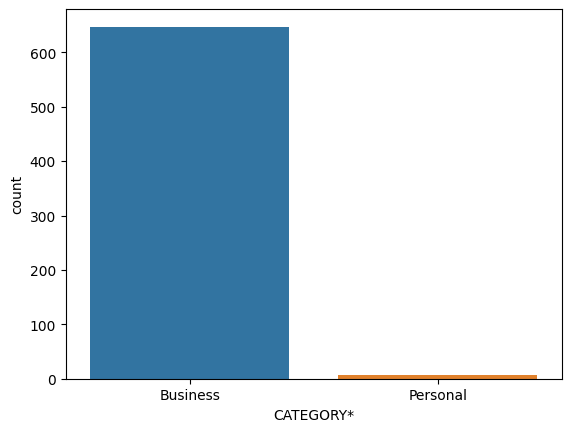

In [33]:
sns.countplot(x='CATEGORY*', data=data)

<Axes: ylabel='Frequency'>

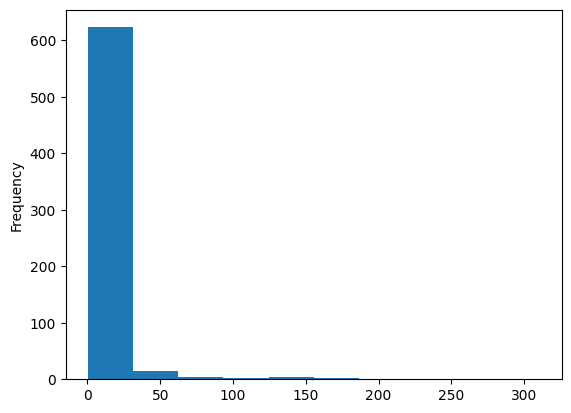

In [34]:
data['MILES*'].plot.hist()

Text(0.5, 1.0, 'Number of Trips vs Hours')

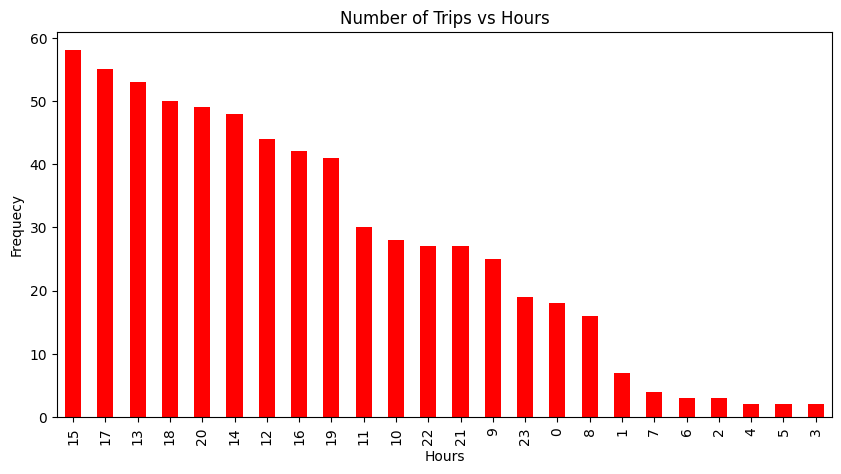

In [35]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar', color='red', figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequecy')
plt.title('Number of Trips vs Hours')

<Axes: >

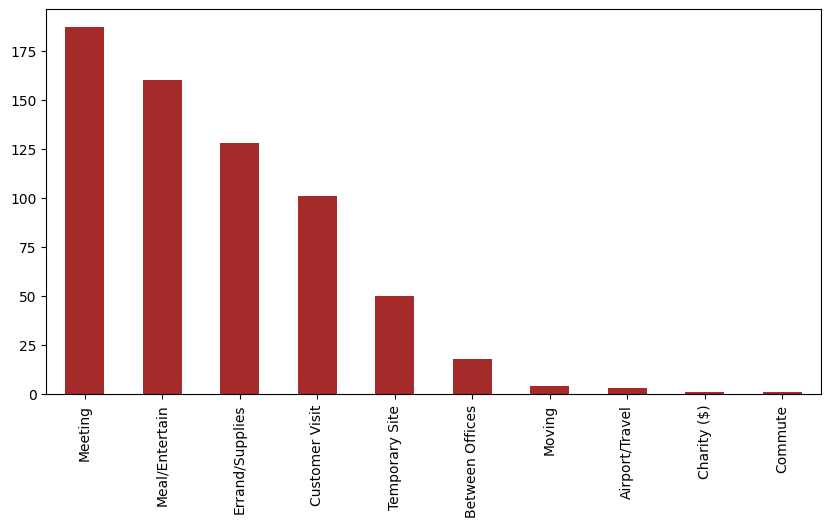

In [36]:
data['PURPOSE*'].value_counts().plot(kind='bar', color='brown', figsize=(10,5))


<Axes: >

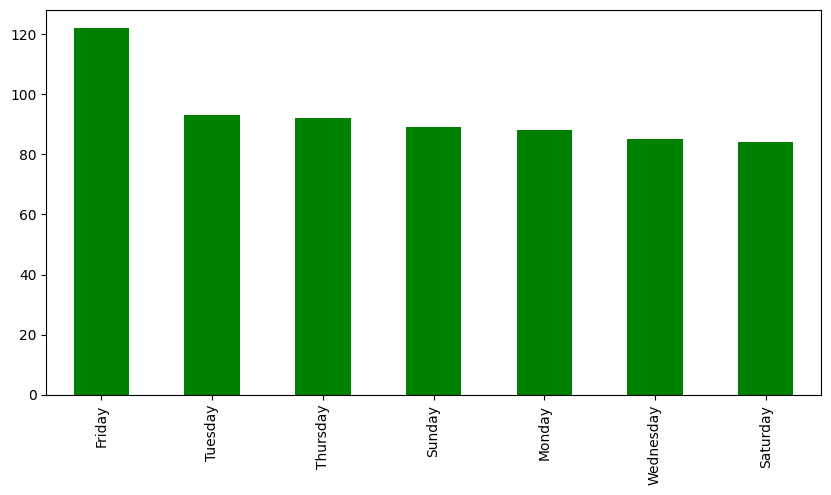

In [37]:
data['WEEKDAY'].value_counts().plot(kind='bar', color='green', figsize=(10,5))


<Axes: >

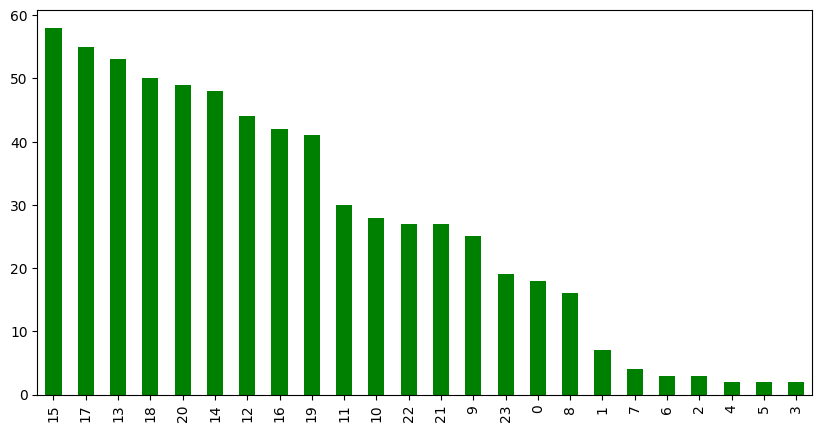

In [38]:
data.HOUR.value_counts().plot(kind='bar', color='green', figsize=(10,5))


<Axes: >

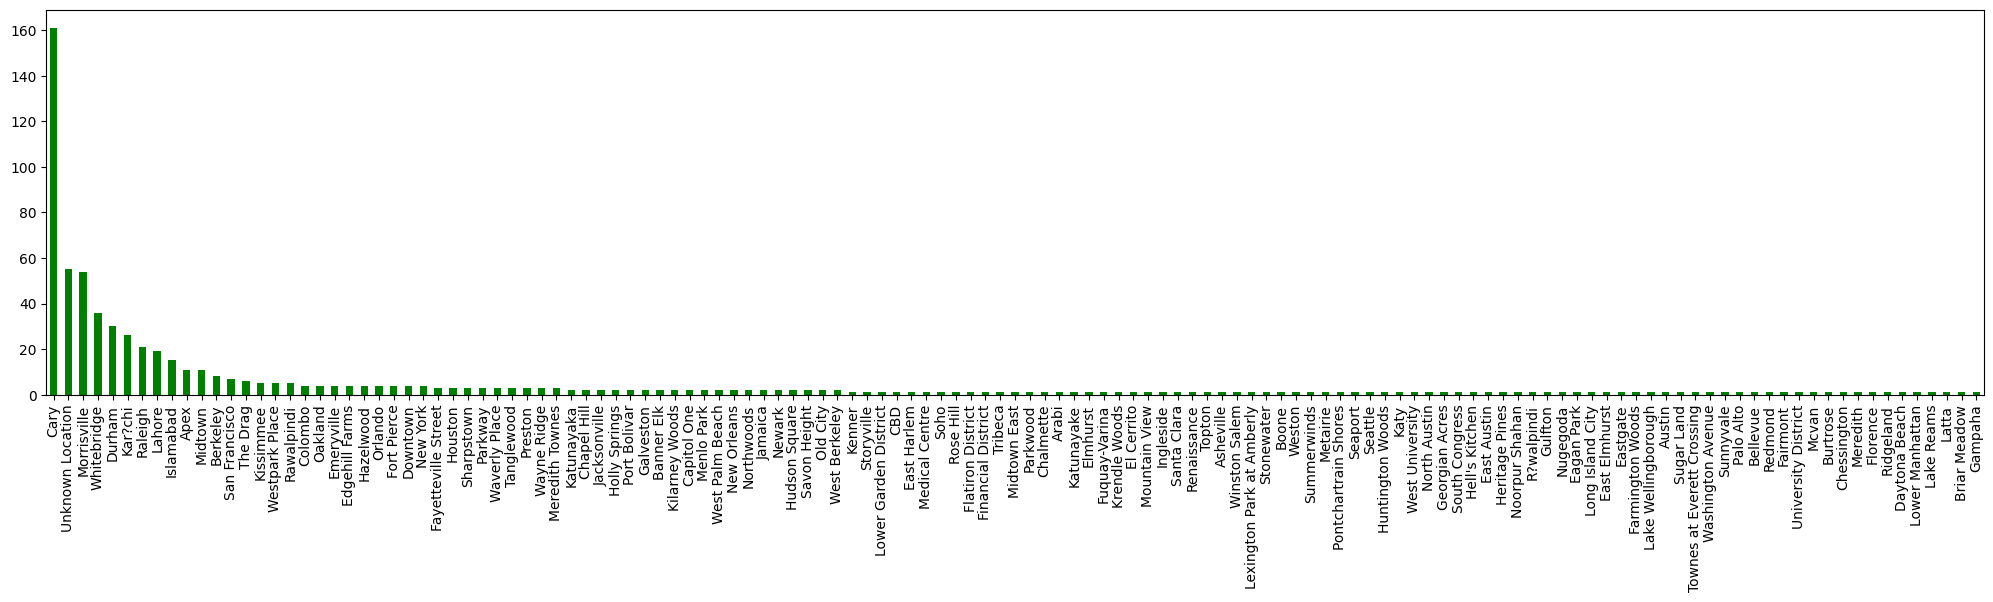

In [44]:
data['START*'].value_counts().plot(kind='bar',orientation='vertical' , color='green', figsize=(25,5))
